In [1]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
# Get the current working directory (should be 'Codes' if running interactively)
current_dir = os.getcwd()
# Navigate up to 'FHN'
fhn_dir = os.path.abspath(os.path.join(current_dir, '..'))
# Change the working directory to 'FHN'
os.chdir(fhn_dir)

In [2]:
import sys
sys.path.insert(1, 'Codes/')
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN


# 1. Read Shapefiles

In [3]:
# World shapefile
shapef = os.path.join(fhn_dir, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(shapef)
gdf = gdf.to_crs("ESRI:54009")

# Custom regions shapefiles 
shapef = os.path.join(fhn_dir, 'Data/SHAPEFILES/world-custom_regions_r.shp')
gdf1 = gpd.read_file(shapef)
gdf1 = gdf1.to_crs("ESRI:54009")

# 2. Define the data

In [5]:
PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'FPP', 'FPP_{window}_{year}.tif')
dfData = return_df(PATHL, gdf1) 

### 2.1 2020

In [6]:
dfData2020 = dfData[dfData['year']==2020].reset_index(drop=True)
dfData2020 = dfData2020.sort_values(by='sum').reset_index(drop=True)
colors = dfData2020['region'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)

### 2.2 Figure 2C

(10000000.0, 1000000000.0)

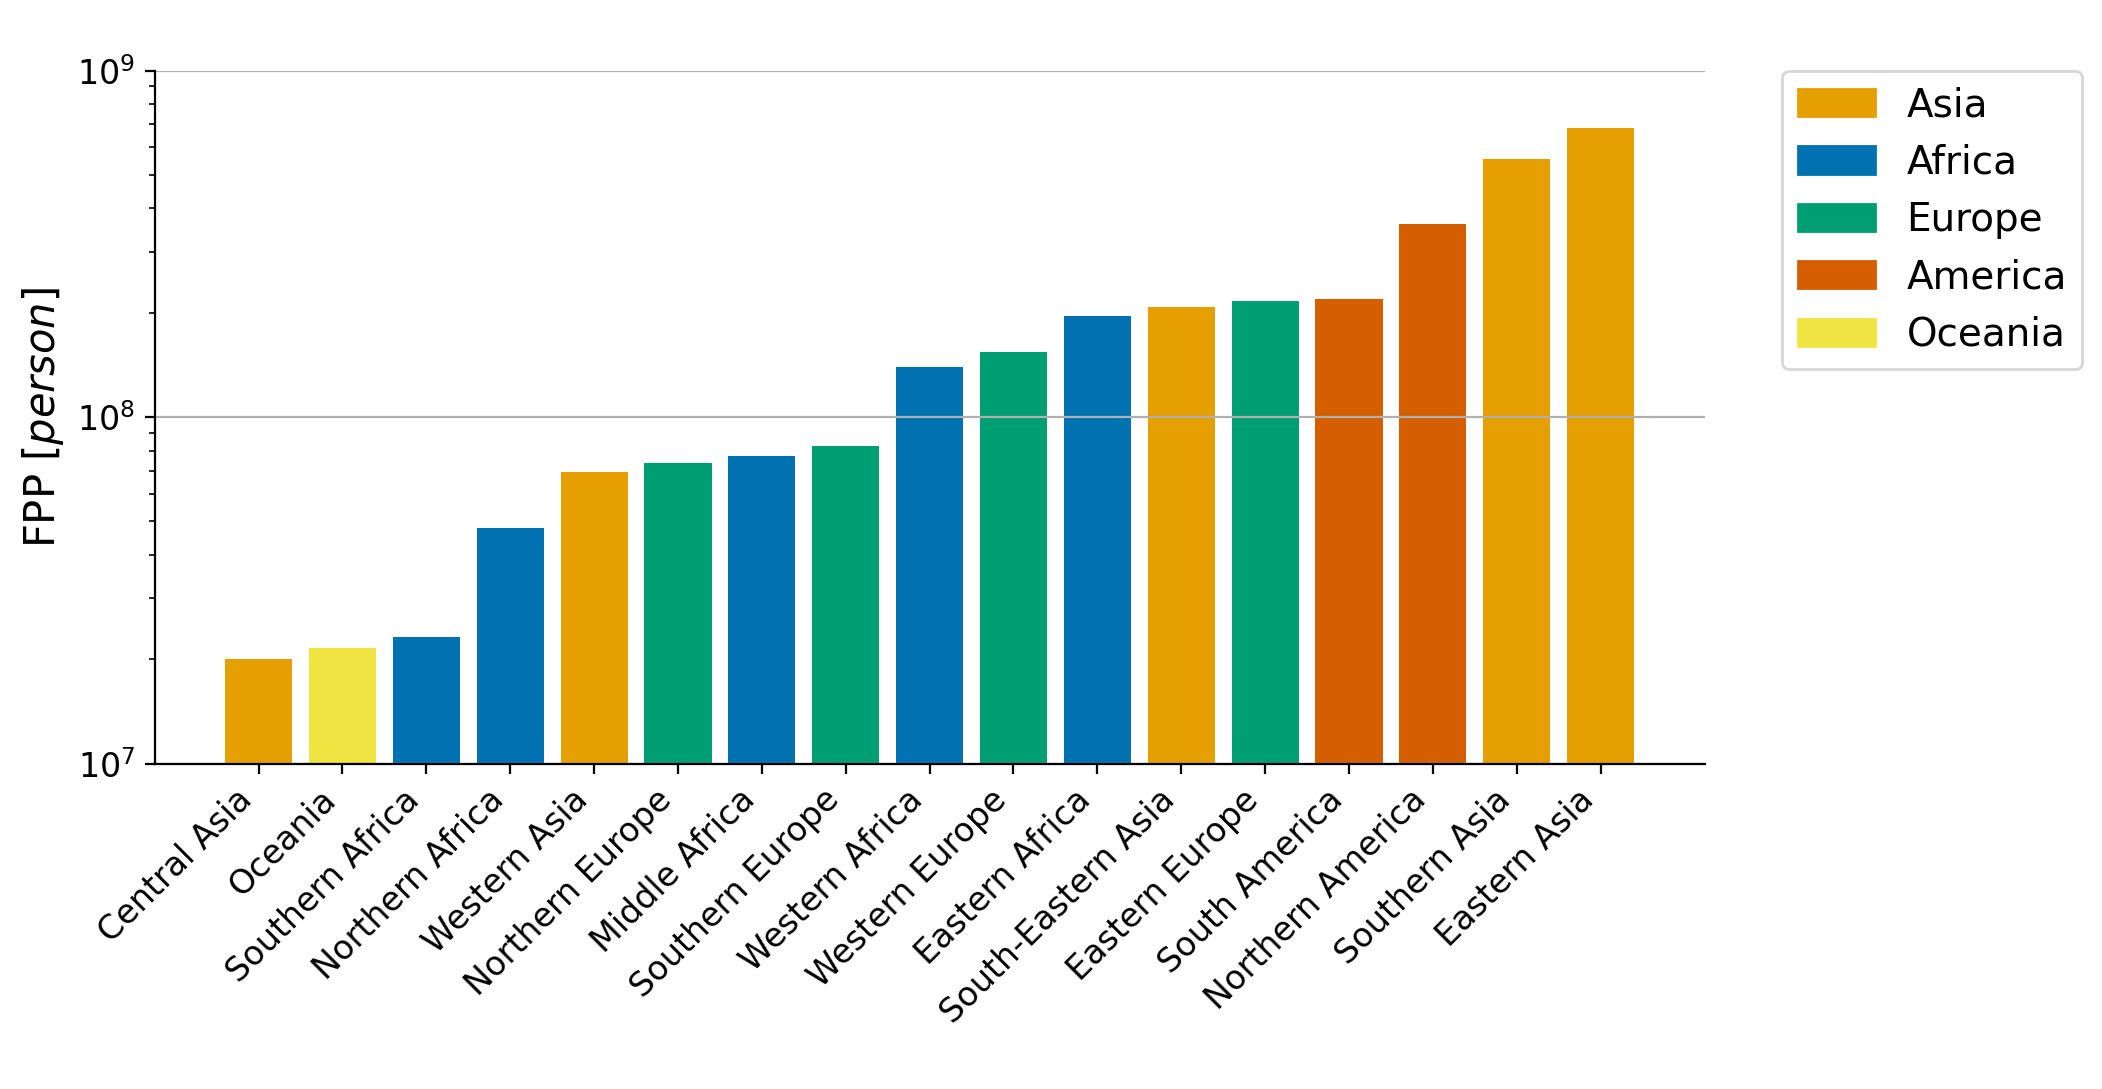

In [7]:
# Plotting the bar plot
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 12)
plt.bar(dfData2020['region'], dfData2020['sum'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP '+r'$[person]$', size=15)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.xticks(rotation=45, ha='right');
ax.set_yscale('log')
ax.set_ylim([1e7, 1e9])

In [33]:
# Save Figure 2C
fout = os.path.join(fhn_dir, 'Figures/Figure2C.tiff')
f.savefig(fout, dpi=300, bbox_inches='tight')

### 2.2 Relative Change

In [9]:
dfData_= rel_change_df(dfData, 'mean')
df5_ = dfData_.sort_values(by='relative_change').reset_index(drop=True)
colors = df5_['region'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)

### 2.3 Figure 1D

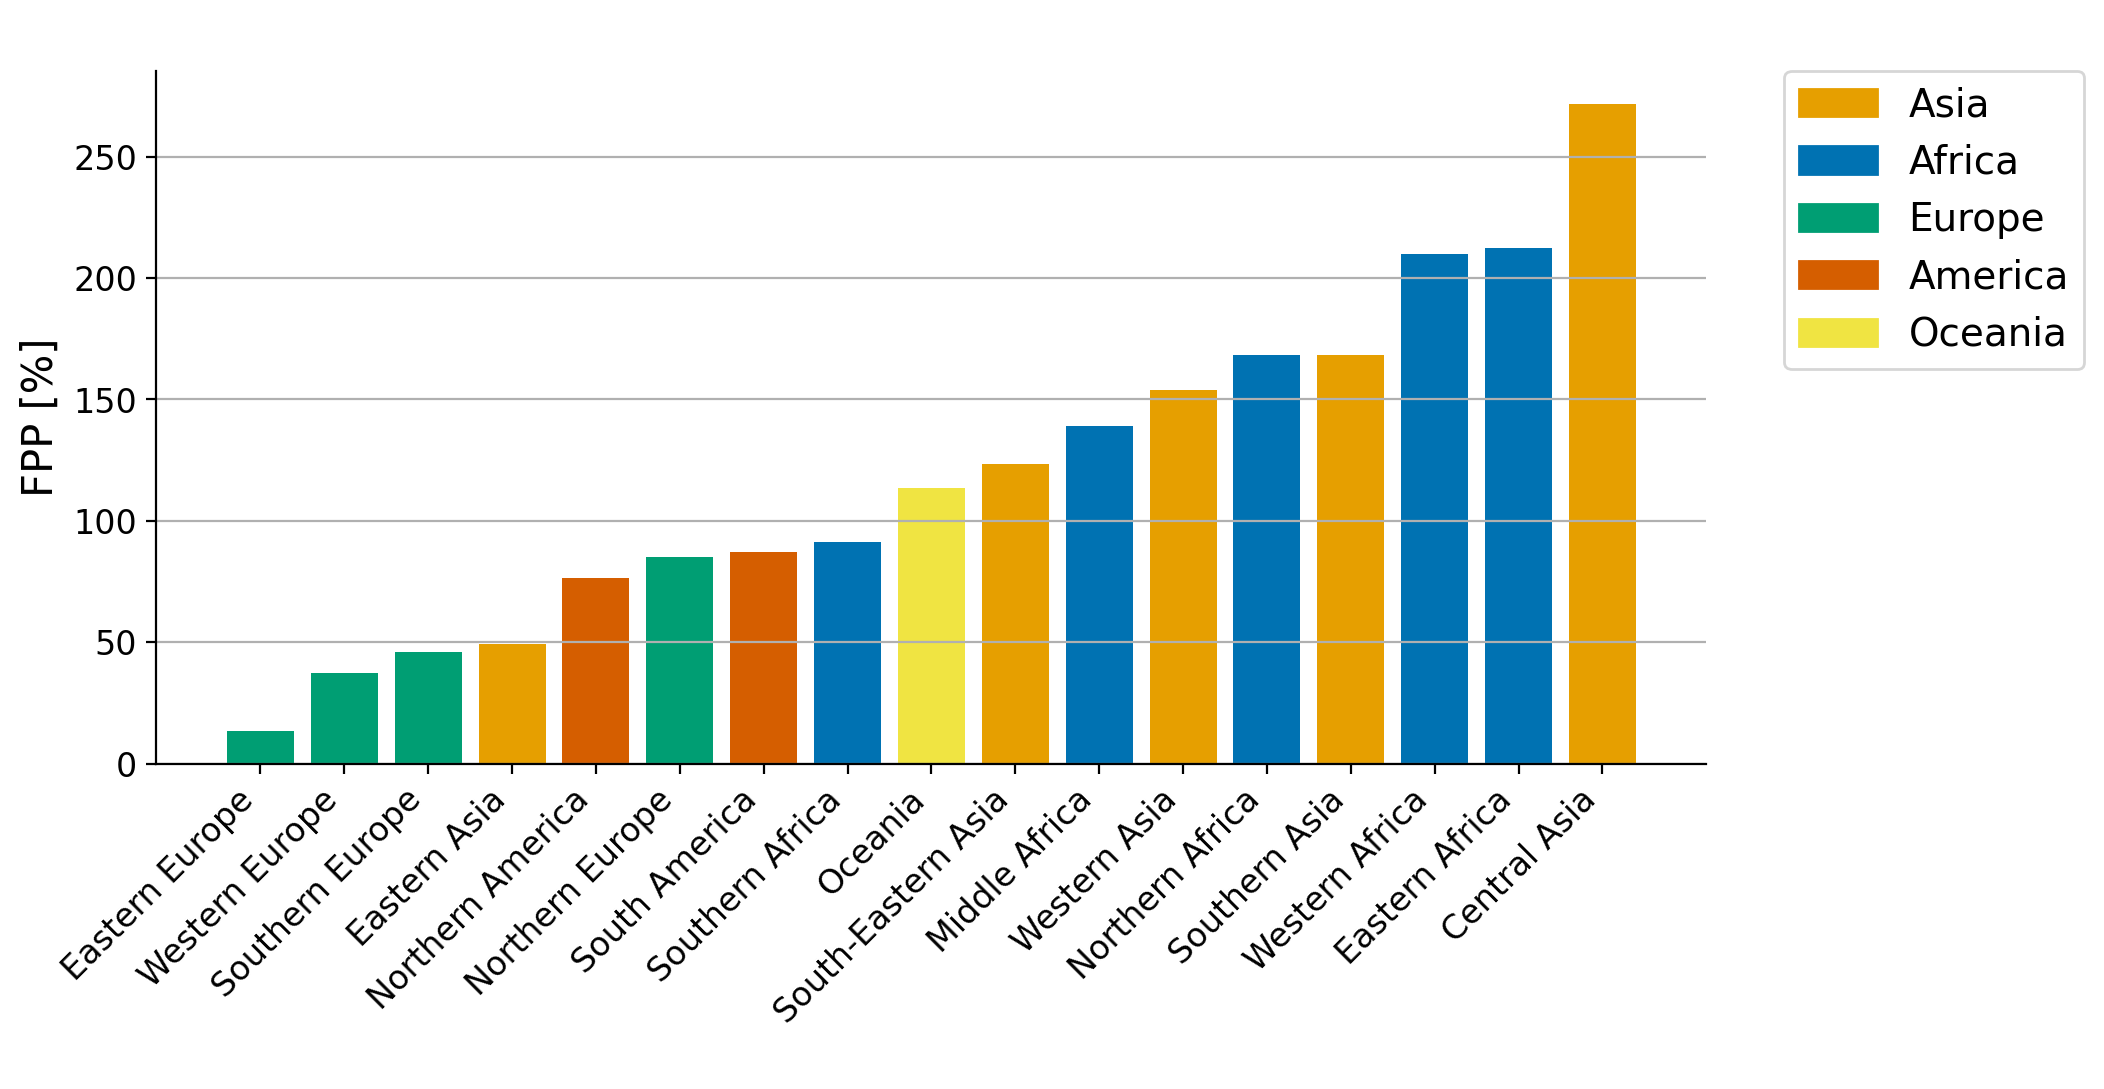

In [10]:
# Plotting the bar plot
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 12)
plt.bar(df5_['region'], df5_['relative_change'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP [%]', size=15)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.xticks(rotation=45, ha='right');

In [28]:
# Save Figure 2D
fout = os.path.join(fhn_dir, 'Figures/Figure2D.tiff')
f.savefig(fout, dpi=300, bbox_inches='tight')